conv_mesh='/Users/theobourdais/miniconda3/envs/PDE/lib/python3.11/site-packages/sfepy/scripts/convert_mesh.py'
mesh='/Users/theobourdais/Desktop/acc_0.mesh'
new_mesh='/Users/theobourdais/Desktop/acc2D_0.mesh'
f"python {conv_mesh} -2 {mesh} {new_mesh}"

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import meshio
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable



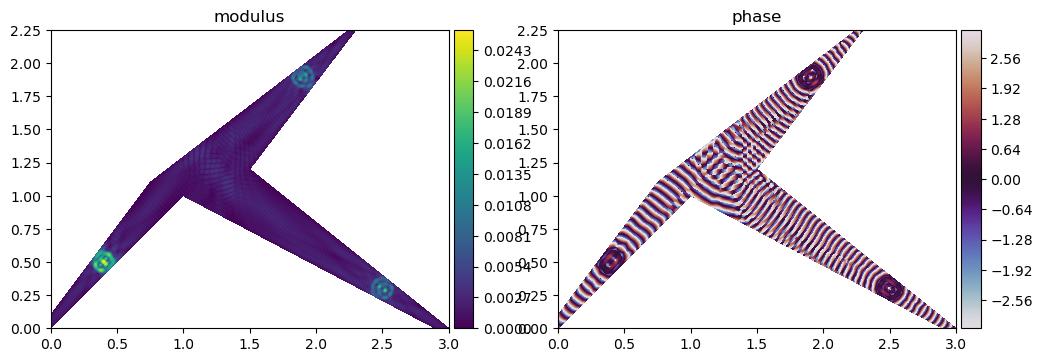

In [65]:

mesh = meshio.read('./sims/acc2D_0_0.vtk')
m=meshio.read('/Users/theobourdais/Desktop/acc2D_0.mesh')

# converts quad elements into tri elements
def quads_to_tris(quads):
    tris = [[None for j in range(3)] for i in range(2*len(quads))]
    for i in range(len(quads)):
        j = 2*i
        n0 = quads[i][0]
        n1 = quads[i][1]
        n2 = quads[i][2]
        n3 = quads[i][3]
        tris[j][0] = n0
        tris[j][1] = n1
        tris[j][2] = n2
        tris[j + 1][0] = n2
        tris[j + 1][1] = n3
        tris[j + 1][2] = n0
    return tris

# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements):
    for element in elements:
        x = [nodes_x[element[i]] for i in range(len(element))]
        y = [nodes_y[element[i]] for i in range(len(element))]
        plt.fill(x, y, edgecolor='black', fill=False)

# FEM data
nodes_x = mesh.points[:,0]
nodes_y = mesh.points[:,1]
nodal_values = mesh.point_data['real.E']+1j*mesh.point_data['imag.E']
elements_tris = m.cells[0][1]
elements_quads = []#[[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 8, 7], [4, 5, 9, 8]]
elements = elements_tris# + elements_quads

# convert all elements into triangles
elements_all_tris = elements_tris# + quads_to_tris(elements_quads)

# create an unstructured triangular grid instance
triangulation = tri.Triangulation(nodes_x, nodes_y, elements_all_tris)

# plot the finite element mesh
##plot two plots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title('modulus')
ax1.axis('equal')
ax2.set_title('phase')
ax2.axis('equal')

# plot the contours
im1=ax1.tricontourf(triangulation, np.abs(nodal_values),levels=200)
im2=ax2.tricontourf(triangulation, np.angle(nodal_values),cmap='twilight',levels=200)

# add a colorbar to each plot

# show
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
plt.show()

/var/folders/wz/lf_5120j21q0kjn46pqx15zr0000gn/T/ipykernel_2099/588864090.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),


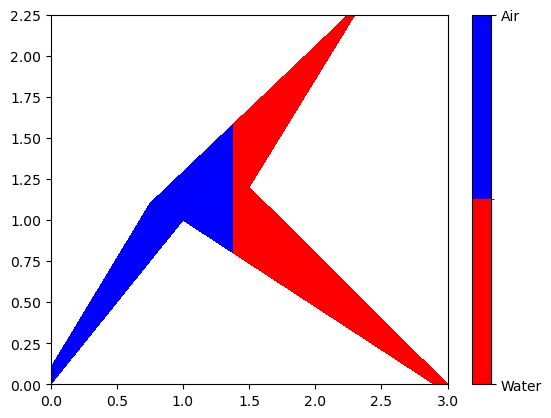

In [66]:
#load vecto in u.txt
import matplotlib as mpl
u=np.loadtxt("./sims/u_1.txt")
random_point=np.loadtxt("./sims/random_point_1.txt")
which_side=((mesh.points[:,:2]-random_point)@u<0).astype(int)
#make a colorbar with two colors
cmap = mpl.colors.ListedColormap(['red', 'blue'])
plt.tricontourf(triangulation, which_side,cmap=cmap)
bounds = [0,0.5,1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                boundaries=bounds, ticks=[0,1])
cbar.set_ticklabels(["Water","Air"])
plt.show()


In [59]:
import glob
glob.glob('/Users/theobourdais/Desktop/Caltech/Research/model_aggregation/ModelAggregation/PDEsolvers/SfePy/sims/acc2D_0_*.vtk')

[]

In [7]:
func=tri.LinearTriInterpolator(triangulation,np.abs(nodal_values))

In [11]:
func(1,1.1)

masked_array(data=484.20882311568124,
             mask=False,
       fill_value=1e+20)

In [18]:
mesh.point_data

{'real.E': array([ 3.31573212e-03,  3.70367592e-01,  1.33956753e-04, ...,
        -3.17365243e-01, -3.10762528e-01, -2.97675935e-01], dtype='>f8'),
 'imag.E': array([ 2.22883893e-03,  9.84825052e-02,  3.42719249e-05, ...,
        -1.11482877e-01, -9.31667075e-02, -1.35425208e-01], dtype='>f8'),
 'node_groups': array([0, 0, 0, ..., 0, 0, 0], dtype='>i8')}